**2.DATA LOADING AND EXPLORATION**

a. Load Data

🔍 Narrative Explanation:
In this section, we begin by importing necessary libraries:

pandas for data manipulation and analysis,

numpy for numerical operations (often used later in analysis).

We then load the COVID-19 dataset (owid-covid-data.csv) into a pandas DataFrame using read_csv(). The print(df) command displays the entire dataset to confirm successful loading and provides a quick glance at the structure.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('owid-covid-data.csv')
print(df)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
...         ...       ...          ...         ...          ...        ...   
429430      ZWE    Africa     Zimbabwe  2024-07-31     266386.0        0.0   
429431      ZWE    Africa     Zimbabwe  2024-08-01     266386.0        0.0   
429432      ZWE    Africa     Zimbabwe  2024-08-02     266386.0        0.0   
429433      ZWE    Africa     Zimbabwe  2024-08-03     266386.0        0.0   
429434      ZWE    Africa     Zimbabwe  2024-08-04     266386.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

b. Check Columns

🔍 Narrative Explanation:
df.columns lists all column names in the dataset, helping us identify what data is available for analysis (e.g., total_cases, location, total_vaccinations).


In [2]:
print("Columns in the dataset:")
print(df.columns.tolist())

Columns in the dataset:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinat

c. Preview Rows

df.head() displays the first 5 rows, giving us a quick preview of how the data is structured and stored.

In [3]:
print("\nFirst few rows of the dataset:")
display(df.head())


First few rows of the dataset:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


d. Identify Mssing Values

df.isnull().sum() shows the number of missing (null) values in each column, helping us identify which columns may need cleaning or imputation.

In [4]:
print("\nMissing values in each column:")
display(df.isnull().sum())



Missing values in each column:


,0
iso_code,0
continent,26525
location,0
date,0
total_cases,17631
...,...
population,0
excess_mortality_cumulative_absolute,416024
excess_mortality_cumulative,416024
excess_mortality,416024


**3.DATA CLEANING**



a. Filter Countries of Interest

🔍 Narrative Explanation:
We filter the dataset to include only Kenya, the USA, and India using isin(), narrowing our focus to these countries of interest.


In [5]:
# Define the countries you're interested in
countries = ['Kenya', 'United States', 'India']

# Filter the DataFrame to include only these countries
df_filtered = df[df['location'].isin(countries)]
print(df_filtered)

       iso_code      continent       location        date  total_cases  \
173549      IND           Asia          India  2020-01-05          0.0   
173550      IND           Asia          India  2020-01-06          0.0   
173551      IND           Asia          India  2020-01-07          0.0   
173552      IND           Asia          India  2020-01-08          0.0   
173553      IND           Asia          India  2020-01-09          0.0   
...         ...            ...            ...         ...          ...   
405120      USA  North America  United States  2024-07-31  103436829.0   
405121      USA  North America  United States  2024-08-01  103436829.0   
405122      USA  North America  United States  2024-08-02  103436829.0   
405123      USA  North America  United States  2024-08-03  103436829.0   
405124      USA  North America  United States  2024-08-04  103436829.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
173549        0.0                 NaN       

b.Drop rows with missing dates/critical values

Rows missing critical values (e.g., date, total_cases, new_cases) are dropped to ensure clean, usable data.

In [6]:
critical_columns = ['date', 'location', 'total_cases', 'new_cases']
df_filtered = df_filtered.dropna(subset=critical_columns)
print(df_filtered)

       iso_code      continent       location        date  total_cases  \
173549      IND           Asia          India  2020-01-05          0.0   
173550      IND           Asia          India  2020-01-06          0.0   
173551      IND           Asia          India  2020-01-07          0.0   
173552      IND           Asia          India  2020-01-08          0.0   
173553      IND           Asia          India  2020-01-09          0.0   
...         ...            ...            ...         ...          ...   
404678      USA  North America  United States  2023-05-16  103436829.0   
404679      USA  North America  United States  2023-05-17  103436829.0   
404680      USA  North America  United States  2023-05-18  103436829.0   
404681      USA  North America  United States  2023-05-19  103436829.0   
404682      USA  North America  United States  2023-05-20  103436829.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
173549        0.0                 NaN       

c. Convert date column to datetime

The date column is converted to a datetime object, enabling time-series operations.

In [7]:
df_filtered['date'] = pd.to_datetime(df_filtered['date'])
print(df_filtered ['date'])

173549   2020-01-05
173550   2020-01-06
173551   2020-01-07
173552   2020-01-08
173553   2020-01-09
            ...    
404678   2023-05-16
404679   2023-05-17
404680   2023-05-18
404681   2023-05-19
404682   2023-05-20
Name: date, Length: 4580, dtype: datetime64[ns]


<ipython-input-7-612a3f146e92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])


d. Handle missing numeric values with fillna() or interpolate()

Missing values in numeric columns are handled using linear interpolation, filling gaps based on surrounding data trends.

In [8]:
# Fill missing numeric values using interpolation (linear)
numeric_cols = df_filtered.select_dtypes(include='number').columns
df_filtered[numeric_cols] = df_filtered[numeric_cols].interpolate(method='linear')
print(df_filtered[numeric_cols])

        total_cases  new_cases  new_cases_smoothed  total_deaths  new_deaths  \
173549          0.0        0.0                 NaN           0.0         0.0   
173550          0.0        0.0                 NaN           0.0         0.0   
173551          0.0        0.0                 NaN           0.0         0.0   
173552          0.0        0.0                 NaN           0.0         0.0   
173553          0.0        0.0                 NaN           0.0         0.0   
...             ...        ...                 ...           ...         ...   
404678  103436829.0        0.0           13322.857     1127152.0         0.0   
404679  103436829.0        0.0           13322.857     1127152.0         0.0   
404680  103436829.0        0.0           13322.857     1127152.0         0.0   
404681  103436829.0        0.0           13322.857     1127152.0         0.0   
404682  103436829.0        0.0           13322.857     1127152.0         0.0   

        new_deaths_smoothed  total_case

<ipython-input-8-4bf003dbb7e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[numeric_cols] = df_filtered[numeric_cols].interpolate(method='linear')


e. Check again for missing values

In [9]:
df_filtered.isnull().sum()

,0
iso_code,0
continent,0
location,0
date,0
total_cases,0
...,...
population,0
excess_mortality_cumulative_absolute,3348
excess_mortality_cumulative,3348
excess_mortality,3348


**4. EXPLORATORY DATA ANALYSIS**

a. Import relevant libraries



In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

b.Line plot: Total cases over time for selected countries

🔍 Narrative Explanation:
This line plot shows how the cumulative number of COVID-19 cases evolved over time in each of the selected countries. It helps identify:

Outbreak waves,

Growth rates,

And the general timeline of infections.

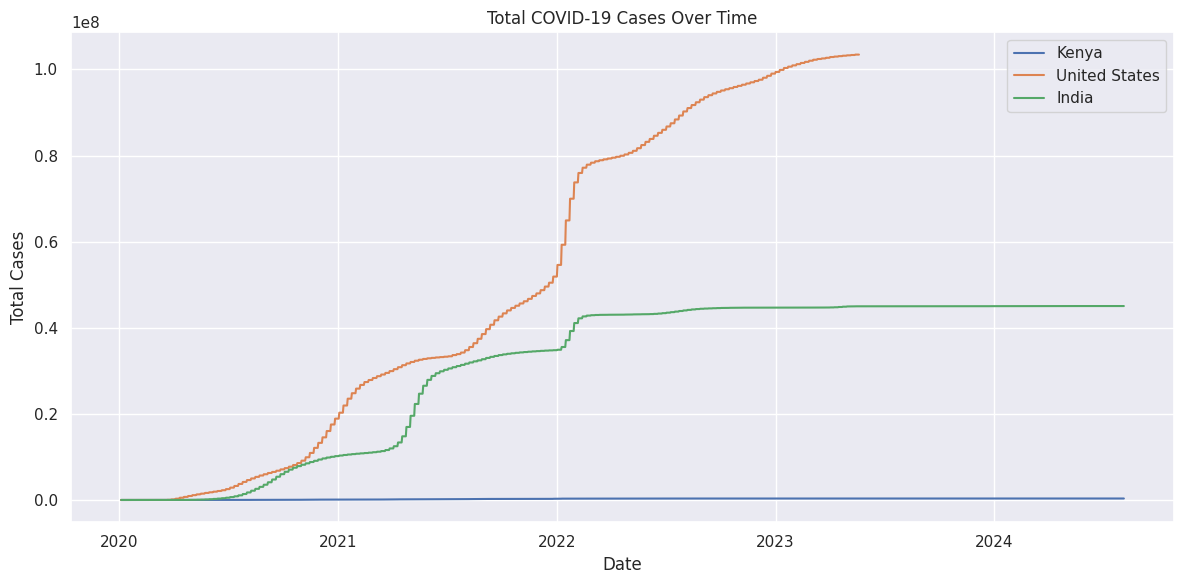

In [11]:
plt.figure(figsize=(12, 6))
for country in ['Kenya', 'United States', 'India']:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()

c. Line plot: Total deaths over time for selected countries

🔍 Narrative Explanation:
This visualization tracks total COVID-19 deaths over time by country. It helps us compare the mortality burden and examine how death tolls rose during various waves.

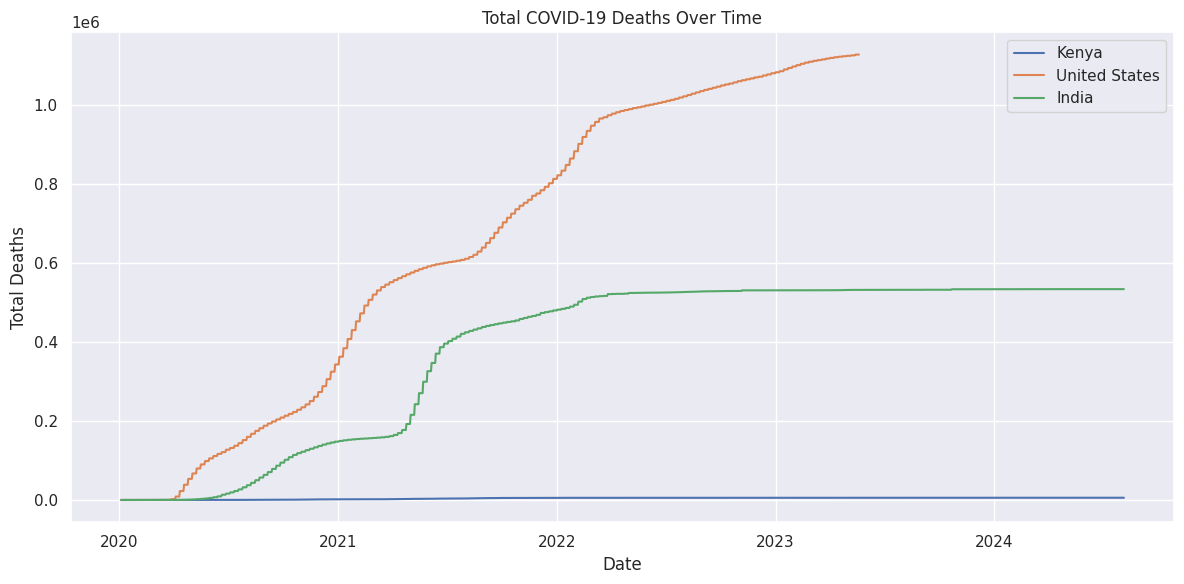

In [12]:
plt.figure(figsize=(12, 6))
for country in ['Kenya', 'United States', 'India']:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.tight_layout()
plt.show()


d. Line plot: Daily new cases over time

🔍 Narrative Explanation:
This chart compares daily new cases to analyze infection surges and assess whether countries experienced sharp waves or a steady increase. It’s useful for spotting outbreak peaks.



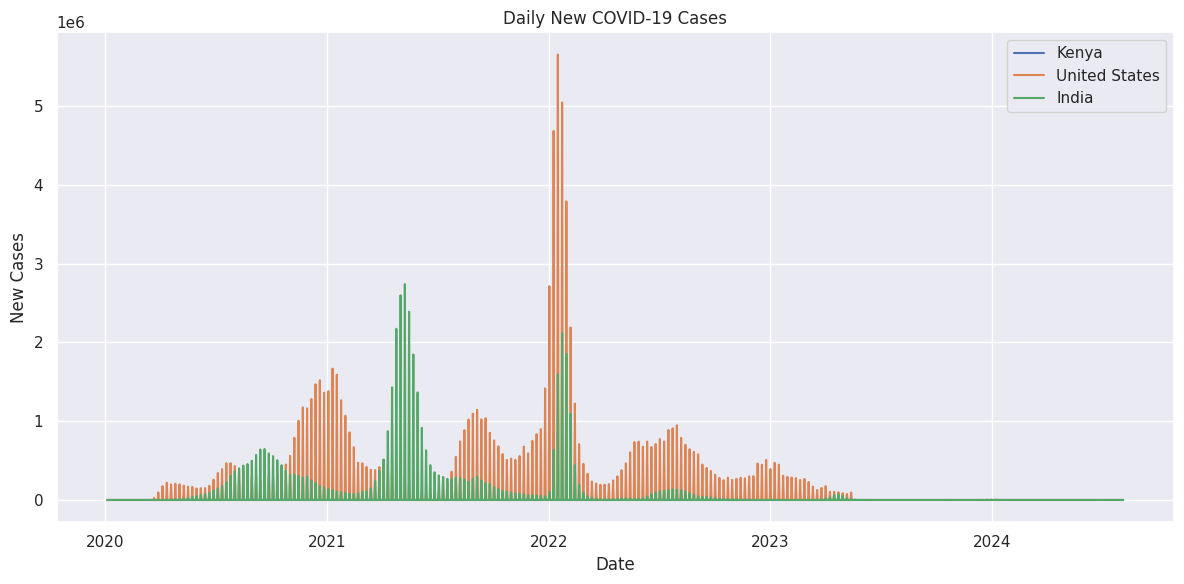

In [13]:
plt.figure(figsize=(12, 6))
for country in ['Kenya', 'United States', 'India']:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()

e. Line plot: Death rate over time

🔍 Narrative Explanation:
We calculate the death rate as the ratio of total deaths to total cases. Plotting this over time helps assess:

Severity of outbreaks,

Improvements in treatment,

Or limitations in reporting/testing.



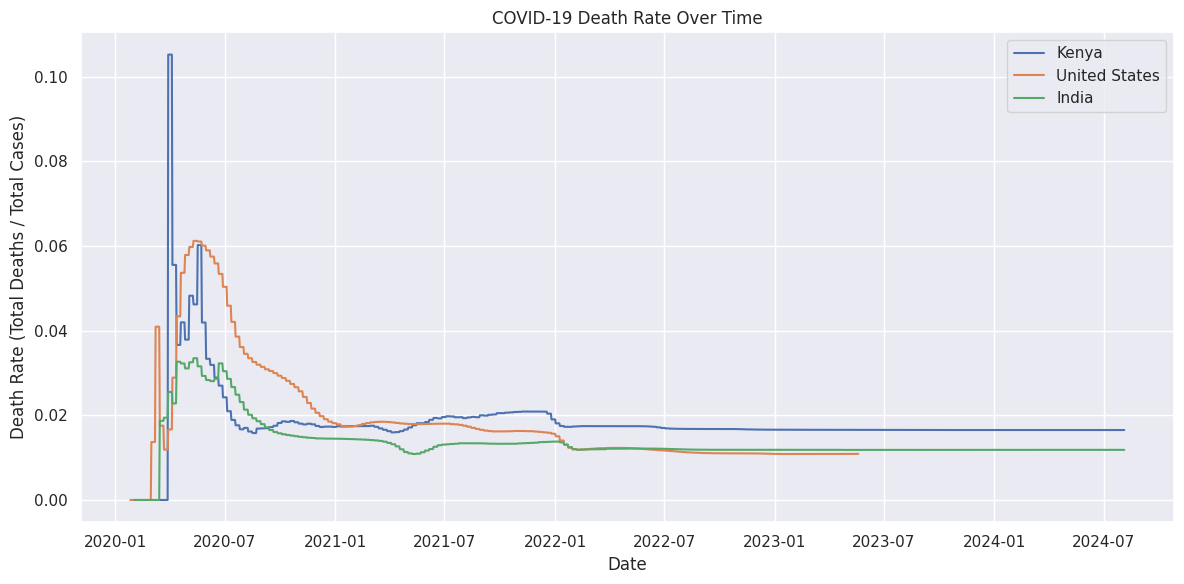

In [14]:
# Create a new column for death rate: total_deaths / total_cases
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']

# Line plot: Death rate over time
plt.figure(figsize=(12, 6))
for country in ['Kenya', 'United States', 'India']:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate (Total Deaths / Total Cases)')
plt.legend()
plt.tight_layout()
plt.show()

f.Bar chart: Top countries by total cases

<ipython-input-15-2548c597e66a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='Reds_r')


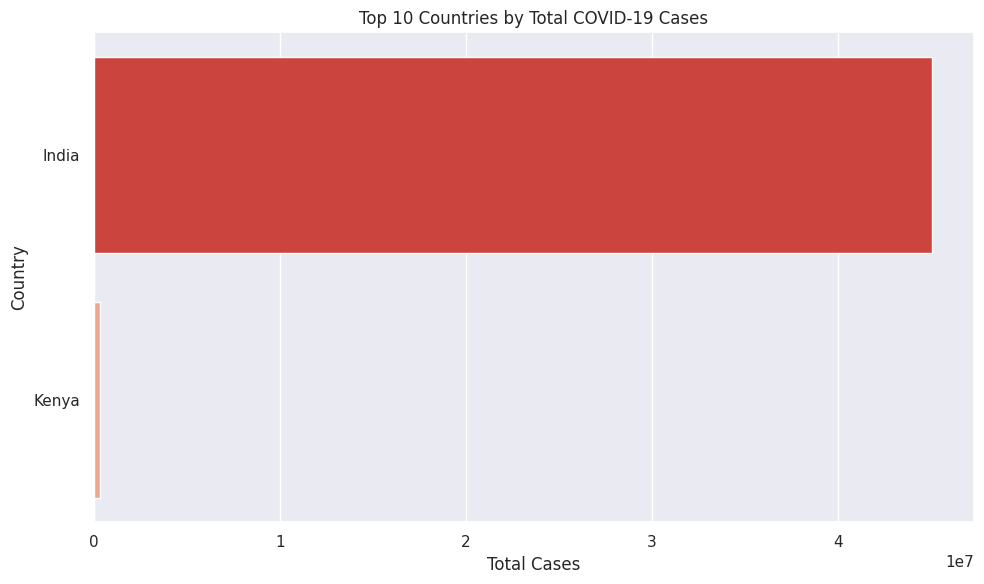

In [15]:
# Get the latest available date in the filtered data
latest_date = df_filtered['date'].max()

# Extract data for that date only
latest_data = df_filtered[df_filtered['date'] == latest_date]

# Group by country and get top 10 by total cases
top_countries = latest_data.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10)

# Bar chart: Top countries by total cases
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Reds_r')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

g. Heatmap: Show correlation coefficients

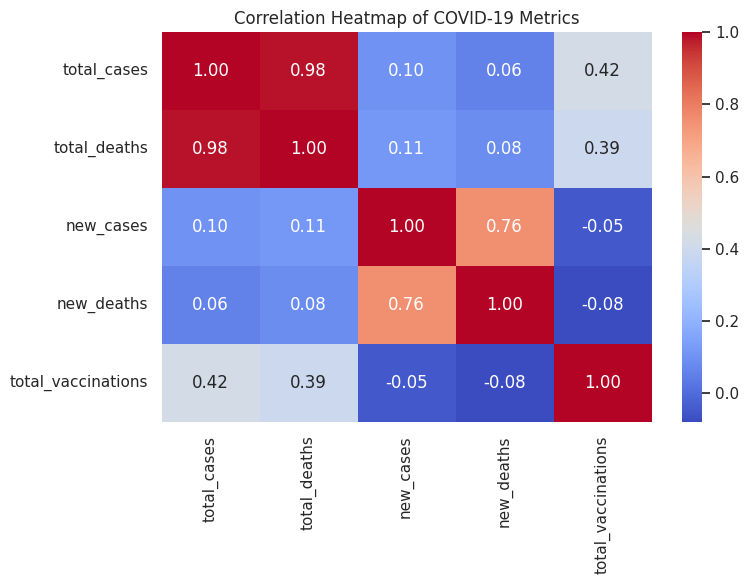

In [16]:
# Select relevant numeric columns for correlation analysis
corr_cols = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']
correlation_matrix = df_filtered[corr_cols].corr()

# Heatmap: Show correlation coefficients
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of COVID-19 Metrics')
plt.tight_layout()
plt.show()

**5. VISUALIZATION OF VACCINATION PROCESS**

a. Line chart: Total vaccinations over time for selected countries

🔍 Narrative Explanation:
This line chart displays how total vaccinations have progressed over time in each country. It helps identify who began early, who scaled fastest, and who lagged behind

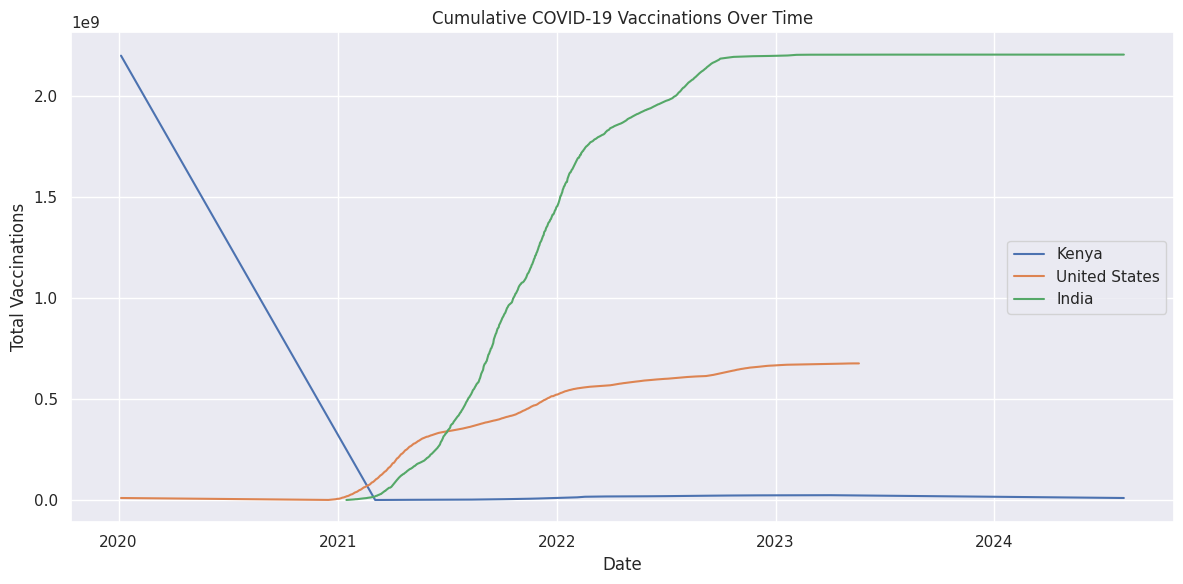

In [17]:
plt.figure(figsize=(12, 6))
for country in ['Kenya', 'United States', 'India']:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)

plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.tight_layout()
plt.show()

b. Bar chart: Percentage of population vaccinated

🔍 Narrative Explanation:
This line chart displays how total vaccinations have progressed over time in each country. It helps identify who began early, who scaled fastest, and who lagged behind

<ipython-input-18-ba3cbd8a8425>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location', y='people_vaccinated_per_hundred', data=latest_vax, palette='viridis')


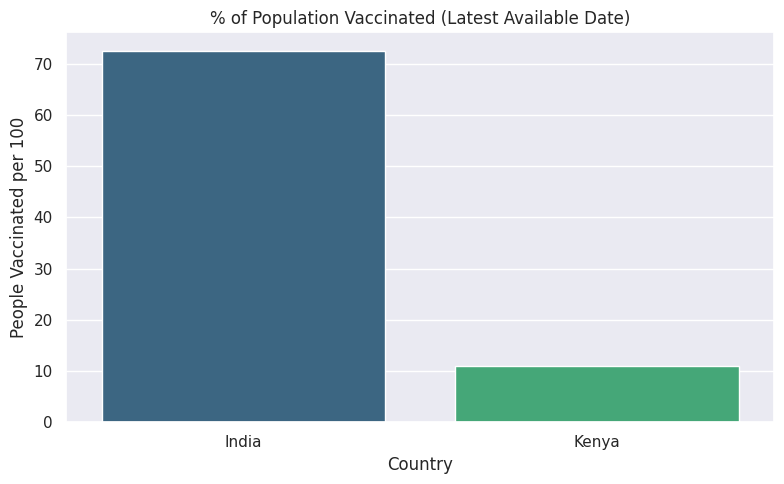

In [18]:
# Select latest data for selected countries
latest_vax = df_filtered[df_filtered['date'] == df_filtered['date'].max()]
latest_vax = latest_vax[latest_vax['location'].isin(['Kenya', 'United States', 'India'])]

# Bar chart: Percentage of population vaccinated
plt.figure(figsize=(8, 5))
sns.barplot(x='location', y='people_vaccinated_per_hundred', data=latest_vax, palette='viridis')

plt.title('% of Population Vaccinated (Latest Available Date)')
plt.ylabel('People Vaccinated per 100')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

c. Pie charts for each country (vaccinated vs unvaccinated)

🔍 Narrative Explanation:
These charts break down each country's population into vaccinated vs unvaccinated portions, offering a quick visual of coverage at the latest date.

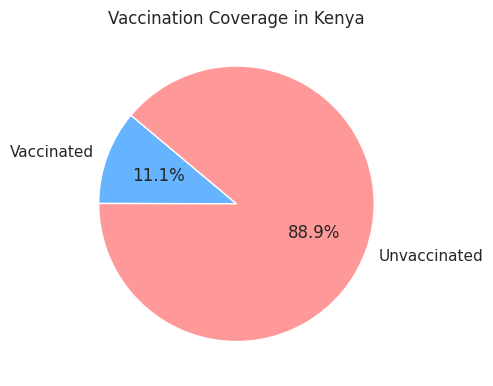

No vaccination data available for United States.


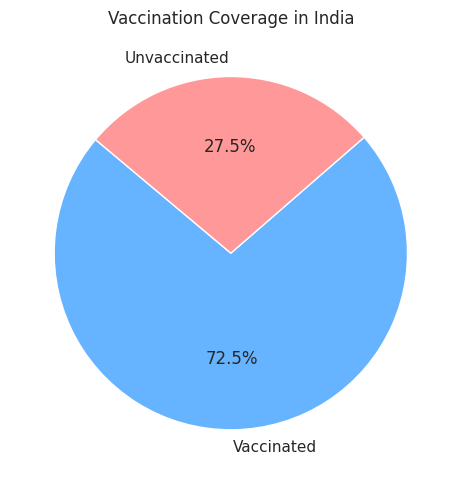

In [19]:
# Pie charts for each country (vaccinated vs unvaccinated)
for country in ['Kenya', 'United States', 'India']:
    try:
        value = latest_vax[latest_vax['location'] == country]['people_vaccinated_per_hundred'].values[0]
        vaccinated = value
        unvaccinated = 100 - vaccinated

        plt.figure(figsize=(5, 5))
        plt.pie([vaccinated, unvaccinated],
                labels=['Vaccinated', 'Unvaccinated'],
                autopct='%1.1f%%',
                startangle=140,
                colors=['#66b3ff', '#ff9999'])
        plt.title(f'Vaccination Coverage in {country}')
        plt.tight_layout()
        plt.show()

    except IndexError:
        print(f"No vaccination data available for {country}.")

6. CHLOROPETH MAP

🔍 Narrative Explanation:
We use Plotly Express to generate interactive choropleth maps:

One shows total COVID-19 cases per country.

The other maps percentage of population vaccinated.

The color scale is customized (red to black) to emphasize extremes — darker shades represent higher values — making it easy to spot global hot zones or high-vaccine-coverage areas.

In [20]:
# Install in the Colab environment
!pip install plotly

In [21]:
import plotly.express as px

In [22]:
# Get the latest data for each country
latest_data = df[df['date'] == df['date'].max()]

# Keep only rows with valid ISO codes and total_cases
choropleth_data = latest_data[['iso_code', 'location', 'total_cases', 'total_vaccinations', 'people_vaccinated_per_hundred']]
choropleth_data = choropleth_data.dropna(subset=['iso_code', 'total_cases'])

In [23]:
# Define a custom red-to-black color scale
red_black_scale = [
    [0.0, 'rgb(255, 200, 200)'],   # light red for low values
    [0.5, 'rgb(255, 0, 0)'],       # strong red for mid-range
    [1.0, 'rgb(0, 0, 0)']          # black for high values
]

# Plot a choropleth map with custom red-black scale
fig = px.choropleth(
    choropleth_data,
    locations='iso_code',
    color='total_cases',
    hover_name='location',
    color_continuous_scale=red_black_scale,
    title='Total COVID-19 Cases (Red to Black Scale)',
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    coloraxis_colorbar=dict(title='Total Cases')
)
fig.show()


In [24]:
# Plot vaccination coverage using the same red-to-black scale
fig = px.choropleth(
    choropleth_data,
    locations='iso_code',
    color='people_vaccinated_per_hundred',
    hover_name='location',
    color_continuous_scale=red_black_scale,
    title='% of Population Vaccinated (Red to Black Scale)',
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    coloraxis_colorbar=dict(title='% Vaccinated')
)
fig.show()
